In [1]:
from environment import BreakoutWrapper
import numpy as np

import gymnasium as gym
from gymnasium.wrappers import RecordVideo
import ale_py
gym.register_envs(ale_py)

In [2]:
#env = gym.make("ALE/Breakout-v5")
breakout_env = BreakoutWrapper(game="ALE/Breakout-v5", render_mode=None, device="cuda")

A.L.E: Arcade Learning Environment (version 0.11.2+ecc1138)
[Powered by Stella]


In [3]:
# Get a single raw frame from the environment
raw_frame = breakout_env.env.reset()[0]  # This returns the initial observation
print(f"Raw frame shape: {raw_frame.shape}")
print(f"Raw frame dtype: {raw_frame.dtype}")
print(f"Raw frame value range: [{raw_frame.min()}, {raw_frame.max()}]")

# Get preprocessed frame from the BreakoutWrapper
preprocessed_frame = breakout_env._preprocess(raw_frame, crop_region=(18,102))
print(f"\nPreprocessed frame shape: {preprocessed_frame.shape}")
print(f"Preprocessed frame dtype: {preprocessed_frame.dtype}")
print(f"Preprocessed frame value range: [{preprocessed_frame.min()}, {preprocessed_frame.max()}]")

Raw frame shape: (210, 160, 3)
Raw frame dtype: uint8
Raw frame value range: [0, 200]

Preprocessed frame shape: torch.Size([1, 1, 84, 84])
Preprocessed frame dtype: torch.float32
Preprocessed frame value range: [0.0, 0.5882353186607361]


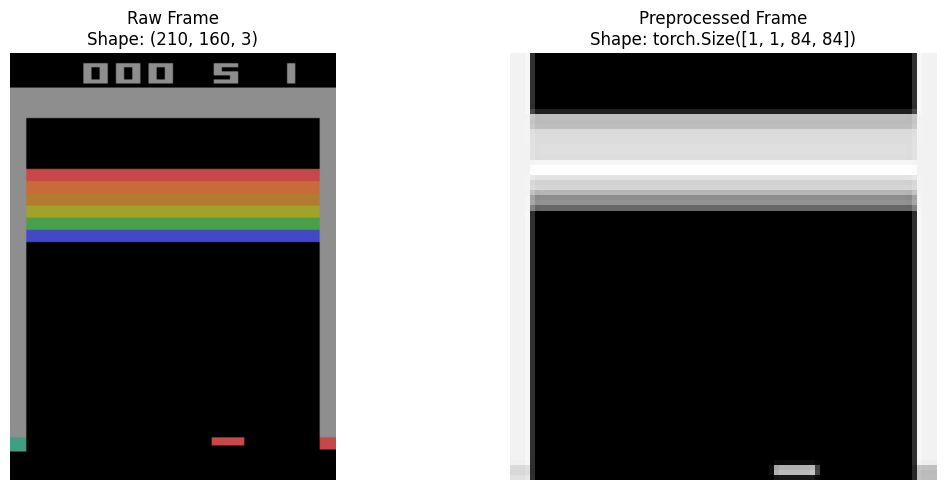

In [4]:
import matplotlib.pyplot as plt

# Visualize both frames side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Display raw frame
axes[0].imshow(raw_frame)
axes[0].set_title(f'Raw Frame\nShape: {raw_frame.shape}')
axes[0].axis('off')

# Display preprocessed frame
axes[1].imshow(preprocessed_frame.to("cpu").squeeze(0).squeeze(0), cmap='gray')
axes[1].set_title(f'Preprocessed Frame\nShape: {preprocessed_frame.shape}')
axes[1].axis('off')

plt.tight_layout()
plt.show()

**Observations**:
* The frame was correctly converted from RGB to grayscale: going from 3 channels to 1 channel.
* The frame was correctly resized from (210, 160) to (84, 84), with a resize and a crop operation. The crop operation correctly focused on the play area of the game, removing unnecessary parts of the image (e.g., score, borders).

**Conclusion**:
The preprocessing steps have been successfully applied to the Atari game frame, preparing it for input into a reinforcement learning model.